##**Instituto Tecnológico de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

**Ciencia y Analítica de datos**

**Nombre del trabajo** Semana 4 Actividad 1

**Nombre del maestro:** Jobish Vallikavungal Devassia

**Nombre de los estudiantes:** Kevin Brandon Cruz Jorge Fernández Lara

**Matrículas:**	A01794176 A01793062

**Fecha de entrega:** 11 de octubre de 2022

Importamos las librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA

Importamos los datos

In [3]:
credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Creamos el data frame

In [4]:
credit_clients_df = pd.read_csv(credit)
df = credit_clients_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Verificamos su falta algún dato

In [5]:
print('¿Falta algún dato?',df.isnull().values.any())

¿Falta algún dato? True


Identificamos los datos faltantes

In [6]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Renombramos los atributos para mejor entendimiento conforme la definición de los datos

In [7]:
df = df.rename(columns = {'X1':'Monto_credito',
                          'X2':'Género',
                          'X3':'Nivel_Educativo',
                          'X4':'Estado_Civil',
                          'X5':'Edad',
                          'X6':'Pago_sep',
                          'X7':'Pago_ago',
                          'X8':'Pago_jul',
                          'X9':'Pago_jun',
                          'X10':'Pago_may',
                          'X11':'Pago_abr',
                          'X12':'Amortiz_sep',
                          'X13':'Amortiz_ago',
                          'X14':'Amortiz_jul',
                          'X15':'Amortiz_jun',
                          'X16':'Amortiz_may',
                          'X17':'Amortiz_abr',
                          'X18':'Pago_prev_sep',
                          'X19':'Pago_prev_ago',
                          'X20':'Pago_prev_jul',
                          'X21':'Pago_prev_jun',
                          'X22':'Pago_prev_may',
                          'X23':'Pago_prev_abr'},
                          inplace = False)

In [8]:
df

,ID,Monto_credito,Género,Nivel_Educativo,Estado_Civil,Edad,Pago_sep,Pago_ago,Pago_jul,Pago_jun,...,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Eliminamos atributos categórcos

In [9]:
df.drop(columns={'ID',
                 'Género',
                 'Nivel_Educativo',
                 'Estado_Civil',
                 'Pago_sep',
                 'Pago_ago',
                 'Pago_jul',
                 'Pago_jun',
                 'Pago_may',
                 'Pago_abr',
                 'Y'},
                 inplace = True)

In [10]:
df

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [11]:
print('¿Falta algún dato?',df.isna().values.any())

¿Falta algún dato? True


In [12]:
df.isna().any()

Monto_credito    False
Edad              True
Amortiz_sep       True
Amortiz_ago       True
Amortiz_jul       True
Amortiz_jun       True
Amortiz_may       True
Amortiz_abr       True
Pago_prev_sep     True
Pago_prev_ago     True
Pago_prev_jul     True
Pago_prev_jun     True
Pago_prev_may     True
Pago_prev_abr     True
dtype: bool

In [13]:
df.dropna(inplace  = True)
print('¿Falta algún dato?',df.isna().values.any())

¿Falta algún dato? False


¿qué tipos de datos tenemos?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29971 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Monto_credito  29971 non-null  int64  
 1   Edad           29971 non-null  float64
 2   Amortiz_sep    29971 non-null  float64
 3   Amortiz_ago    29971 non-null  float64
 4   Amortiz_jul    29971 non-null  float64
 5   Amortiz_jun    29971 non-null  float64
 6   Amortiz_may    29971 non-null  float64
 7   Amortiz_abr    29971 non-null  float64
 8   Pago_prev_sep  29971 non-null  float64
 9   Pago_prev_ago  29971 non-null  float64
 10  Pago_prev_jul  29971 non-null  float64
 11  Pago_prev_jun  29971 non-null  float64
 12  Pago_prev_may  29971 non-null  float64
 13  Pago_prev_abr  29971 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.4 MB


In [15]:
df

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [16]:
df.shape

(29971, 14)

Veamos la correlación de los datos

In [17]:
df_num = df.iloc[:,:]
df_num.head()

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [18]:
df_num.corr()

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
Monto_credito,1.000000,0.144551,0.285535,0.278342,0.283268,0.293992,0.295543,0.290418,0.195021,0.178351,0.210048,0.203190,0.217000,0.219566
Edad,0.144551,1.000000,0.056359,0.054465,0.053879,0.051489,0.049486,0.047790,0.026038,0.021832,0.029282,0.021357,0.022851,0.019569
Amortiz_sep,0.285535,0.056359,1.000000,0.951499,0.892279,0.860282,0.829787,0.802645,0.140266,0.099292,0.156869,0.158246,0.167030,0.179278
Amortiz_ago,0.278342,0.054465,0.951499,1.000000,0.928312,0.892464,0.859761,0.831576,0.280303,0.100757,0.150643,0.147319,0.157865,0.174167
Amortiz_jul,0.283268,0.053879,0.892279,0.928312,1.000000,0.923958,0.883896,0.853306,0.244265,0.316876,0.129941,0.143320,0.179627,0.182236
Amortiz_jun,0.293992,0.051489,0.860282,0.892464,0.923958,1.000000,0.940135,0.900938,0.232889,0.207474,0.299952,0.130098,0.160299,0.177539
Amortiz_may,0.295543,0.049486,0.829787,0.859761,0.883896,0.940135,1.000000,0.946194,0.216941,0.181156,0.252233,0.293044,0.141443,0.164082
Amortiz_abr,0.290418,0.047790,0.802645,0.831576,0.853306,0.900938,0.946194,1.000000,0.199939,0.172589,0.233716,0.250177,0.307697,0.115398
Pago_prev_sep,0.195021,0.026038,0.140266,0.280303,0.244265,0.232889,0.216941,0.199939,1.000000,0.285521,0.252069,0.199496,0.148113,0.185671
Pago_prev_ago,0.178351,0.021832,0.099292,0.100757,0.316876,0.207474,0.181156,0.172589,0.285521,1.000000,0.244711,0.180050,0.180805,0.157569


<AxesSubplot:>

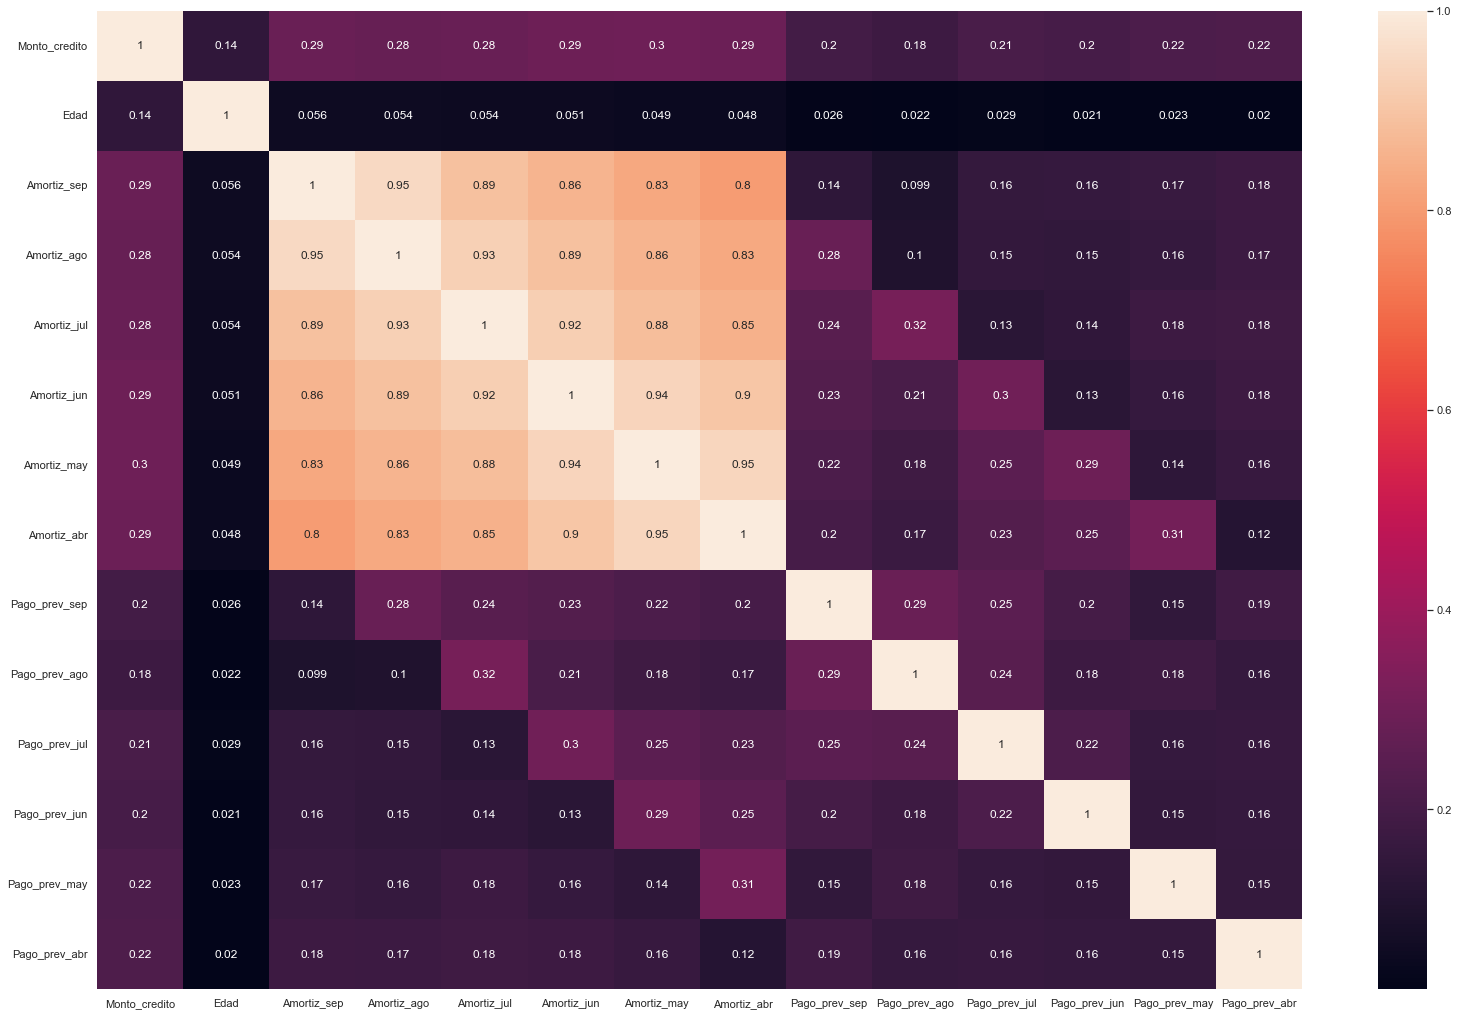

In [19]:
sns.set(rc={'figure.figsize':(27,18)})
sns.heatmap(df.corr(), annot = True)


Las variables con mayor correlación son las amortizaciones

In [20]:
cols = ["Amortiz_sep", "Amortiz_ago", "Amortiz_jul","Amortiz_jun","Amortiz_may","Amortiz_abr"]
summary = {"Varianzas": df_num[cols].var()[:],
           "Valor Min": df_num[cols].min()[:],
           "Valor Max": df_num[cols].max()[:]}

In [21]:
pd.DataFrame(summary, index = cols).transpose()

,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr
Varianzas,5.426205e+09,5.069394e+09,4.812754e+09,4.141589e+09,3.698815e+09,3.549270e+09
Valor Min,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05
Valor Max,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05


In [22]:
t = df_num.var().sum()

Buscamos la varianza de cada una de nuestras variables buscadas:

In [23]:
var_amor_sep = df_num.Amortiz_sep.var()
var_amor_ago = df_num.Amortiz_ago.var()
var_amor_jul = df_num.Amortiz_jul.var()
var_amor_jun = df_num.Amortiz_jun.var()
var_amor_may = df_num.Amortiz_may.var()
var_amor_abr = df_num.Amortiz_abr.var()

In [24]:
print('Varianza Total \t\t\t:',t.round(2) )
print('Varianza Amortización Septiembre:', ((var_amor_sep/t)*100).round(2),'%' )
print('Varianza Amortización Agosto \t:', ((var_amor_ago/t)*100).round(2),'%' )
print('Varianza Amortización Julio \t:', ((var_amor_jul/t)*100).round(2),'%' )
print('Varianza Amortización Junio \t:', ((var_amor_jun/t)*100).round(2),'%' )
print('Varianza Amortización Mayo \t:', ((var_amor_may/t)*100).round(2),'%' )
print('Varianza Amortización Abril \t:', ((var_amor_abr/t)*100).round(2),'%' )

Varianza Total 			: 45440160172.48
Varianza Amortización Septiembre: 11.94 %
Varianza Amortización Agosto 	: 11.16 %
Varianza Amortización Julio 	: 10.59 %
Varianza Amortización Junio 	: 9.11 %
Varianza Amortización Mayo 	: 8.14 %
Varianza Amortización Abril 	: 7.81 %


La corrrelación de la varianza con reglplot

In [42]:
import seaborn as sns

<AxesSubplot:xlabel='Amortiz_jul', ylabel='Amortiz_ago'>

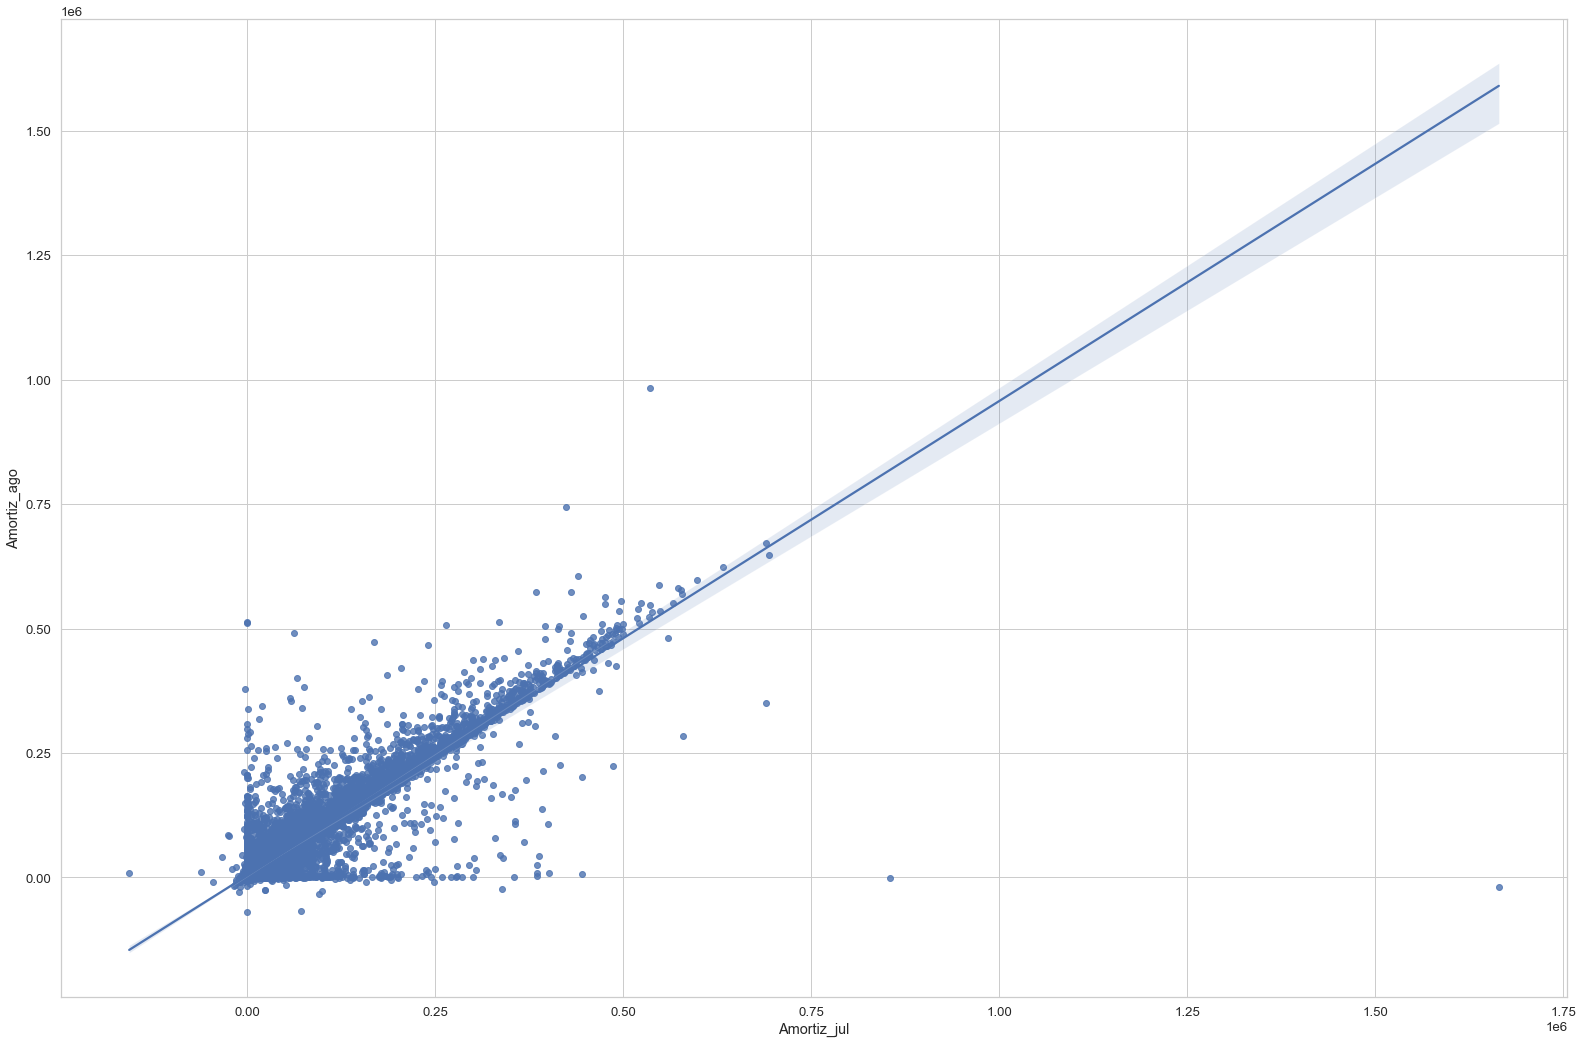

In [43]:
p = sns.regplot(data = df_num,  
                x = df_num.Amortiz_jul, #df_num.Amortiz_ago,df_num.Amortiz_sep], 
                y = df_num.Amortiz_ago #f_num.Amortiz_may,df_num.Amortiz_jun]
               ) 
p

Para poder hacer un correcto análisis es necesario escalar los datos

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)

In [26]:
scaled

array([[-1.13717068, -1.24601836, -0.64262106, ..., -0.30809063,
        -0.31411538, -0.29345757],
       [-0.36634302, -1.02897096, -0.65933263, ..., -0.24428537,
        -0.31411538, -0.18100331],
       [-0.59759132, -0.16078135, -0.29880531, ..., -0.24428537,
        -0.2486798 , -0.01232193],
       ...,
       [-1.06008792,  0.16478975, -0.64734537, ..., -0.04010852,
        -0.18324422, -0.11915347],
       [-0.67467409,  0.59888456, -0.71807427, ..., -0.18520169,
         3.15161475, -0.19202383],
       [-0.90592239,  1.14150306, -0.04507727, ..., -0.24428537,
        -0.2486798 , -0.23723044]])

Para una correcta lectura los acomodamos

In [27]:
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)

In [28]:
scaled_df.head()

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,-1.137171,-1.246018,-0.642621,-0.647502,-0.668106,-0.672592,-0.663184,-0.652856,-0.341883,-0.227134,-0.296787,-0.308091,-0.314115,-0.293458
1,-0.366343,-1.028971,-0.659333,-0.666842,-0.639377,-0.621748,-0.606374,-0.598118,-0.341883,-0.213642,-0.240012,-0.244285,-0.314115,-0.181003
2,-0.597591,-0.160781,-0.298805,-0.494058,-0.482587,-0.449902,-0.417397,-0.391856,-0.250245,-0.191951,-0.240012,-0.244285,-0.248680,-0.012322
3,-0.905922,0.164790,-0.057825,-0.013626,0.032485,-0.232620,-0.187017,-0.156891,-0.221148,-0.169435,-0.228657,-0.237905,-0.244165,-0.237230
4,-0.905922,2.335264,-0.578761,-0.611434,-0.161481,-0.347204,-0.348370,-0.331730,-0.221148,1.334291,0.270964,0.266157,-0.269030,-0.255279


In [29]:
summary = {
"Varianzas": scaled_df[cols].var()[:],
"Valor Min": scaled_df[cols].min()[:],
"Valor Max": scaled_df[cols].max()[:]
}

In [30]:
pd.DataFrame(summary, index = cols).transpose()

,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-2.943591,-1.671105,-2.944976,-3.314226,-2.000543,-6.353307
Valor Max,12.398077,13.128479,23.309571,13.181786,14.582108,15.489284


<AxesSubplot:xlabel='Amortiz_jul', ylabel='Amortiz_ago'>

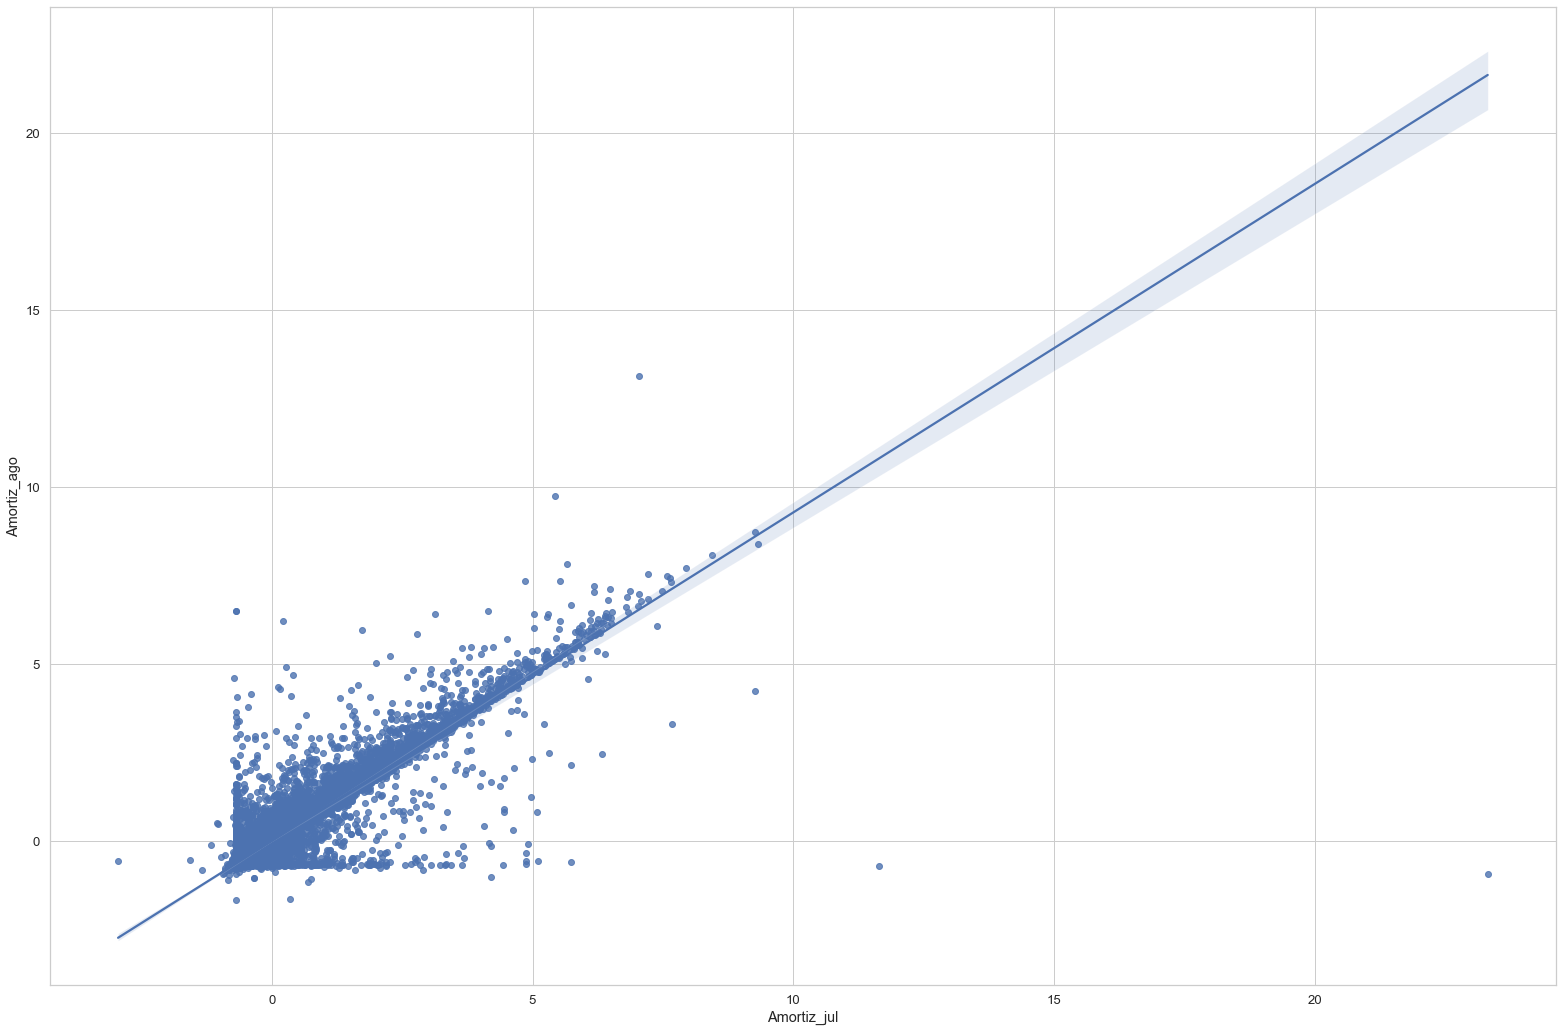

In [44]:
p = sns.regplot(data = scaled_df,  
                x = scaled_df.Amortiz_jul, #df_num.Amortiz_ago,df_num.Amortiz_sep], 
                y = scaled_df.Amortiz_ago #f_num.Amortiz_may,df_num.Amortiz_jun]
               ) 
p

In [31]:
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_df)

In [32]:
pcs_t[:]

array([[-1.95887790e+00, -5.36976783e-01,  1.32988199e+00, ...,
        -3.17287704e-03,  8.17554249e-03,  9.88053784e-03],
       [-1.73571517e+00, -2.17380313e-01,  8.63535489e-01, ...,
         1.22473256e-02, -4.04096623e-03,  7.51221831e-04],
       [-1.22476465e+00, -2.84944537e-01,  2.12831048e-01, ...,
        -8.04786619e-02, -4.13402599e-02, -5.71289583e-02],
       ...,
       [-1.28542208e+00,  1.46470907e-01,  2.50342511e-01, ...,
         3.47045983e-02,  1.28962654e-02, -1.21161067e-02],
       [ 8.30289691e-01,  2.42022994e+00,  3.63912154e-01, ...,
         1.70385091e-01, -1.39916186e-01, -8.16222487e-03],
       [-5.17460556e-01, -6.00587853e-01, -7.49787336e-01, ...,
        -1.76436783e-02,  1.15340875e-01, -4.70370143e-02]])

In [33]:
pcsSummary_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
    })
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277327
1,12.26,54.533517
2,7.46,61.997902
3,6.61,68.606068
4,6.31,74.918324
5,6.23,81.152341
6,5.57,86.721091
7,5.19,91.911243
8,5.05,96.963709
9,1.89,98.852580


In [34]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277327
PC2,12.26,54.533517
PC3,7.46,61.997902
PC4,6.61,68.606068
PC5,6.31,74.918324
PC6,6.23,81.152341
PC7,5.57,86.721091
PC8,5.19,91.911243
PC9,5.05,96.963709
PC10,1.89,98.852580


Con 8 componentes se puede explicar el 91.91% de la información

In [35]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467133800377
Varianza total de los componentes:  14.000467133800472


In [36]:
total_var =scaled_df.var().sum()
pd.DataFrame({"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
              "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) * 100})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Monto_credito,7.142857,7.142857
Edad,7.142857,14.285714
Amortiz_sep,7.142857,21.428571
Amortiz_ago,7.142857,28.571429
Amortiz_jul,7.142857,35.714286
Amortiz_jun,7.142857,42.857143
Amortiz_may,7.142857,50.000000
Amortiz_abr,7.142857,57.142857
Pago_prev_sep,7.142857,64.285714
Pago_prev_ago,7.142857,71.428571


Con los atributos originales hubiera tenido que utilizar 13 para explicar el 92.85% , por lo que PCA simplifica bastante.

In [37]:
comps_df = pd.DataFrame(pcs.components_.round(4),
                        columns = pcs_df.columns,
                        index = scaled_df.columns)

In [38]:
comps_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Monto_credito,0.1655,0.0328,0.3725,0.3833,0.3883,0.3916,0.3885,0.3807
Edad,0.3008,0.0720,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942
Amortiz_sep,-0.3786,-0.8694,-0.0343,-0.0019,0.0347,0.0341,0.0339,0.0185
Amortiz_ago,-0.2000,0.3391,-0.0639,0.0077,0.0605,0.0748,0.0395,-0.0706
Amortiz_jul,0.0353,-0.0399,0.0414,0.0832,0.1138,0.0284,-0.1067,-0.1650
Amortiz_jun,-0.0788,0.0714,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693
Amortiz_may,0.1111,-0.0788,0.0082,-0.0325,-0.1212,0.1265,-0.0076,0.0079
Amortiz_abr,-0.0453,0.0270,0.0093,-0.1356,0.0931,0.0391,0.0497,-0.0004
Pago_prev_sep,-0.8221,0.3304,0.0103,0.0167,-0.0185,0.0191,0.0237,0.0587
Pago_prev_ago,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2052,-0.4200,-0.4889


In [49]:
comps_df.PC1.abs().idxmax()

'Pago_prev_sep'

In [39]:
comps_df.iloc[:,:8].abs().idxmax()

PC1    Pago_prev_sep
PC2      Amortiz_sep
PC3    Pago_prev_ago
PC4    Pago_prev_abr
PC5    Pago_prev_abr
PC6    Pago_prev_jul
PC7    Pago_prev_may
PC8    Pago_prev_jul
dtype: object

In [50]:
comps_df.PC1.abs().idxmin()

'Pago_prev_may'

In [45]:
comps_df.iloc[:,:8].abs().idxmin()

PC1    Pago_prev_may
PC2    Pago_prev_jul
PC3      Amortiz_may
PC4      Amortiz_sep
PC5    Pago_prev_sep
PC6      Amortiz_jun
PC7      Amortiz_may
PC8      Amortiz_abr
dtype: object

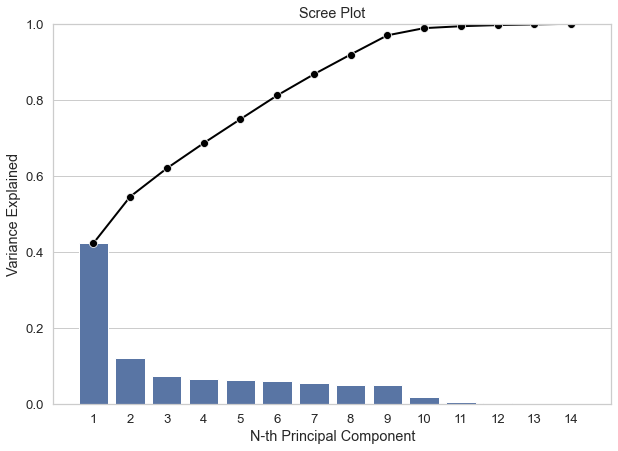

In [40]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

<AxesSubplot:>

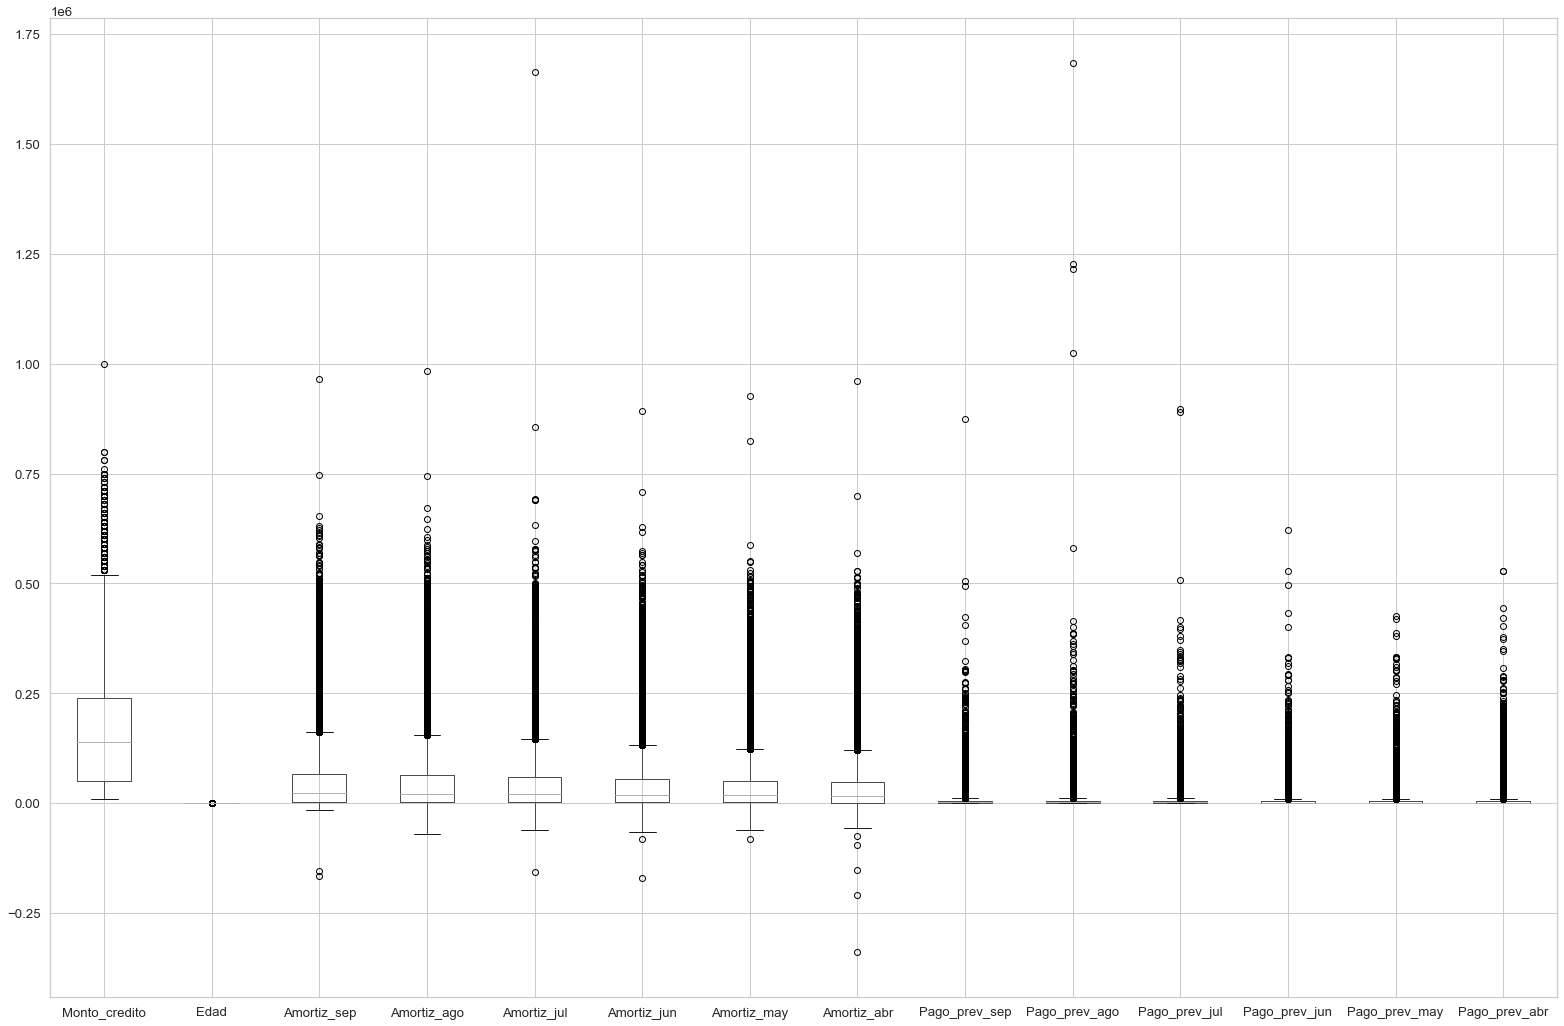

In [41]:
df.boxplot()